# California Sale Properties
Based on the data from realtor.com (December 2022). The goal of this notebook is to explore the dataset and give recommendation given their income level, funds, and preference.

In [2]:
library("stringr")
library("ggplot2")
housing <- read.csv("C:\\Users\\Mumen Rider\\Desktop\\Sale Properties in California\\realtor_california_for_sale.csv")
head(housing)

price,bed,bath,sqft,acre_sqft_lot,address
"$1,195,000",4bed,3.5bath,"2,862sqft",5acre lot,"10130 LA Clair Rd, Wilton, CA 95693"
"$564,900",2bed,2.5bath,"2,230sqft","7,405sqft lot","40389 Calle Ebano, Indio, CA 92203"
"$599,999",3bed,2bath,"2,168sqft","8,712sqft lot","135 Hillside Pl, Jackson, CA 95642"
"$735,000",3bed,2bath,"1,583sqft","5,227sqft lot","54960 Avenida Rubio, La Quinta, CA 92253"
"$554,900",3bed,2.5bath,"2,617sqft","9,148sqft lot","22204 Tumbleweed Dr, Canyon Lake, CA 92587"
"$89,500",2bed,2bath,"1,040sqft",21.66acre lot,"13 Oakwood Dr Unit 13, Petaluma, CA 94954"


## Cleaning values for each column
Changing all the columns except for the addresses to be numerical to make it easier to visualize using ggplot.

In [3]:
housing$price <- sub('.','', housing$price)
housing$price <- sub('\\$.*','', housing$price)
housing$price <- gsub(',','', housing$price)
housing$price <- as.integer(housing$price)

In [4]:
housing$bed <- sub('bed','', housing$bed)
housing$bed[housing$bed=='Studio'] <- '1'
housing$bed <- as.integer(housing$bed)

In [5]:
housing$bath <- sub('bath','', housing$bath)
housing$bath <- sub('\\+','', housing$bath)
housing$bath <- as.numeric(housing$bath)

In [6]:
housing$sqft <- sub('sqft','', housing$sqft)
housing$sqft <- sub(',','', housing$sqft)
housing$sqft <- as.integer(housing$sqft)

Separated sqft_lot and acre_lot into two dataframe. Acre_lot corresponds to home lot bigger than 10,000sqft.

In [7]:
sqft <- housing[str_detect(housing$acre_sqft_lot, 'sqft'),]
colnames(sqft)[5] <- 'sqft_lot'

sqft$sqft_lot <- sub('s.*','', sqft$sqft_lot)
sqft$sqft_lot <- gsub(',','', sqft$sqft_lot)
sqft$sqft_lot <- as.integer(sqft$sqft_lot)

In [8]:
head(sqft)

,price,bed,bath,sqft,sqft_lot,address
2,564900,2,2.5,2230,7405,"40389 Calle Ebano, Indio, CA 92203"
3,599999,3,2.0,2168,8712,"135 Hillside Pl, Jackson, CA 95642"
4,735000,3,2.0,1583,5227,"54960 Avenida Rubio, La Quinta, CA 92253"
5,554900,3,2.5,2617,9148,"22204 Tumbleweed Dr, Canyon Lake, CA 92587"
8,320000,1,1.0,968,4620,"3764 Suter St, Oakland, CA 94619"
9,635000,2,2.0,1000,3733,"734 Tommy Dorsey Ct, Windsor, CA 95492"


In [9]:
acre <- housing[str_detect(housing$acre_sqft_lot, 'acre'),]
colnames(acre)[5] <- 'acre_lot'

acre$acre_lot <- sub('a.*','', acre$acre_lot)
acre$acre_lot <- gsub(',','', acre$acre_lot)
acre$acre_lot <- as.numeric(acre$acre_lot)

In [10]:
head(acre)

,price,bed,bath,sqft,acre_lot,address
1,1195000,4,3.5,2862,5.00,"10130 LA Clair Rd, Wilton, CA 95693"
6,89500,2,2.0,1040,21.66,"13 Oakwood Dr Unit 13, Petaluma, CA 94954"
7,599000,3,3.5,2606,6.92,"30101 Dove Ct, Tehachapi, CA 93561"
12,495000,3,2.0,1516,0.85,"17652 Cindy Ln, Grass Valley, CA 95945"
15,319000,3,2.0,1757,0.32,"20800 Melville Dr, California City, CA 93505"
17,979000,4,2.0,2515,1.34,"11805 Costalot Ln, Lakeside, CA 92040"


## Visualizing Data

In [80]:
options(repr.plot.height=5)
options(scipen=5)
plot_price <- data.frame(Characters=character(), Ints=integer(), stringsAsFactors=FALSE)
colnames(plot_price) <- c('price_range', 'frequency')

In [81]:
for (x in seq(100000, 3000000, by=100000)){
    min <- x-100000
    if(x >= 1000000){
        range <- paste('$', as.integer(min)/1000000, 'M - ', as.integer(x)/1000000, 'M', sep='')
    } else {
        range <- paste('$', as.integer(min)/1000, 'k - ', as.integer(x)/1000, 'k', sep='')
    }
    plot_price[nrow(plot_price)+1, ] <- c(range, nrow(subset(housing, housing$price > min & housing$price <= x)))
}

In [82]:
plot_price[nrow(plot_price)+1, ] <- c('$3M - 4M', nrow(subset(housing, housing$price > 3000000)))
plot_price$frequency <- as.integer(plot_price$frequency)

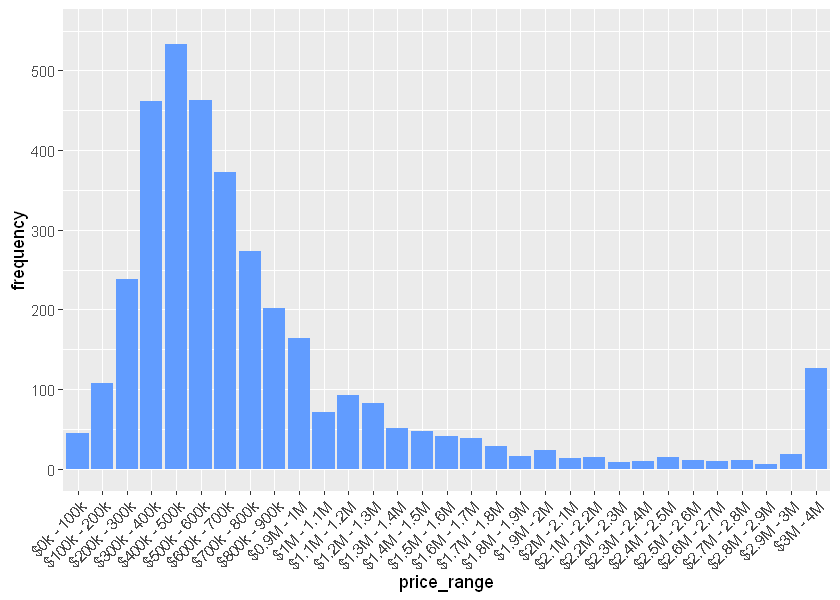

In [83]:
plot <- ggplot(plot_price, aes(price_range, frequency)) + 
        geom_bar(stat='identity', fill='#619CFF') +
        theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1)) +
        scale_y_continuous(limits = c(0,550), breaks=seq(0,550,100)) +
        scale_x_discrete(limits=plot_price$price_range)
plot

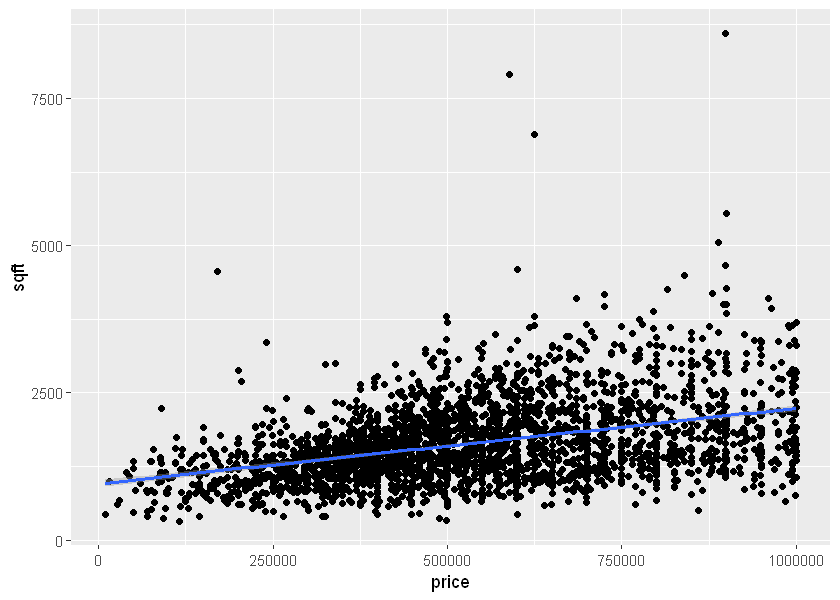

In [129]:
price_sqft <- ggplot(subset(housing, housing$price < 1000000), aes(price, sqft)) +
              geom_point() +
              geom_smooth(method='lm')
price_sqft

## Median Household Income in California
The Median Income for a household in California is \\$84,097.

Let's say a married couple from California is looking for a home within their budget. They are not interested in having a half bath, but would like to have a lot of baths in the home. Lastly, they prefer to have the home on a 1 acre or bigger lot. They have the median household income and have saved up two years worth to spend on the down payment and closing costs. Based on realtor.com's Affordability Calculator, they can afford a \\$459,700 home or less.

Let us use the `acre` dataframe we created early as those houses are more than 10,000sqft.

In [133]:
cali_homes <- subset(acre, acre$price < 459700)

First let's explore the average prices per bedrooms in the home.

In [134]:
price_bed_df <- data.frame(matrix(ncol=2, nrow=length(unique(cali_homes$bed))))
colnames(price_bed_df) = c('Bed', 'AvgPrice')
beds <- cali_homes[order(cali_homes$bed),]
bed_levels <- unique(beds$bed)

In [135]:
for (x in 1:length(bed_levels)){
    price_bed_df[x,] <- c(unique(beds$bed)[x], mean(cali_homes[cali_homes$bed==bed_levels[x],]$price))
}

In [146]:
price_bed_df

Bed,AvgPrice
1,316642.4
2,290303.6
3,337423.2
4,367908.9
5,292414.3
6,339000.0


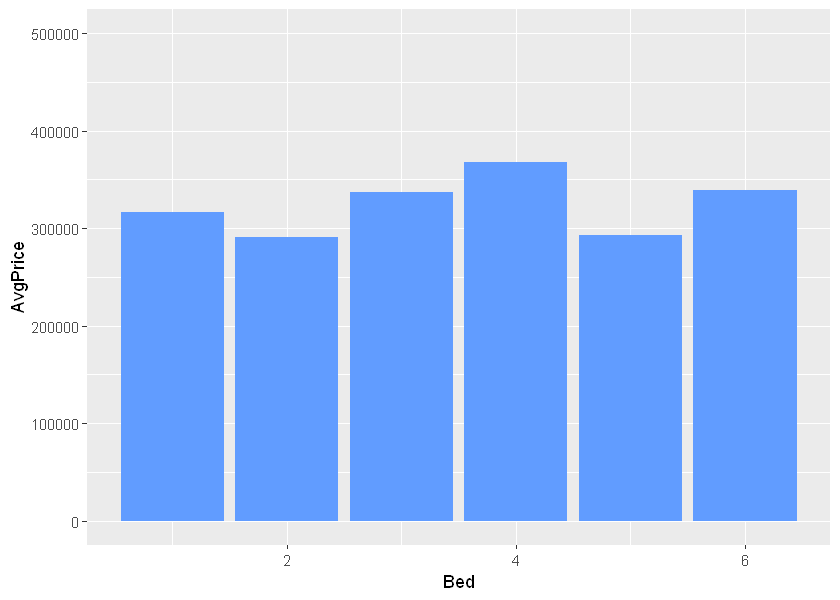

In [137]:
price_bed = ggplot(price_bed_df, aes(Bed, AvgPrice)) +
            geom_bar(stat='identity', fill='#619CFF') +
            scale_y_continuous(limits = c(0,500000), breaks=seq(0,500000,100000))
price_bed

From the graph we can see that a home with two bedrooms are the cheapest while a home with four bedrooms are the most expensive out of the bunch. However a home with five bedrooms is almost the same price as a two bedroom home.

Next, we'll explore the average price per baths in the home.

In [138]:
price_bath_df <- data.frame(matrix(ncol=2, nrow=length(unique(cali_homes$bath))))
colnames(price_bath_df) = c('Bath', 'AvgPrice')
baths <- cali_homes[order(cali_homes$bath),]
bath_levels <- unique(baths$bath)

In [139]:
for (x in 1:length(bath_levels)){
    price_bath_df[x,] <- c(unique(baths$bath)[x], mean(cali_homes[cali_homes$bath==bath_levels[x],]$price))
}

In [147]:
price_bath_df

Bath,AvgPrice
1.0,294818.7
1.5,346135.0
2.0,322014.5
2.5,390221.1
3.0,368624.3
3.5,301666.7


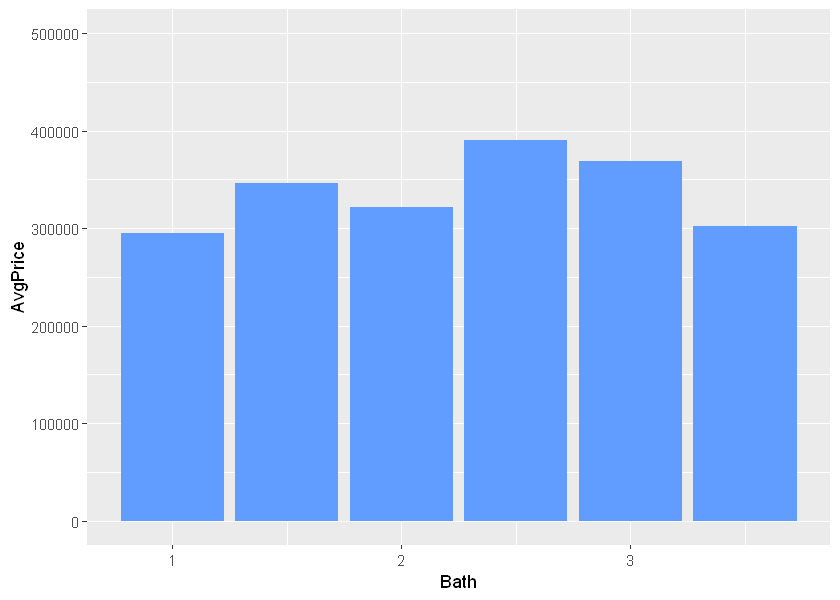

In [141]:
price_bath = ggplot(price_bath_df, aes(Bath, AvgPrice)) +
            geom_bar(stat='identity', fill='#619CFF') +
            scale_y_continuous(limits = c(0,500000), breaks=seq(0,500000,100000))
price_bath

Since our married couple wants a home with lots of bath, we can recommend a home with 3 baths that has an average price of \\$36,8624.30 Now let us compare the home size to the lot size.

In [175]:
best_homes <- subset(cali_homes, cali_homes$bath==3)
head(best_homes[order(-best_homes$acre_lot),], 10)

,price,bed,bath,sqft,acre_lot,address
89,285000,3,3,1379,80.00,"1245 Iron Gate Rd, Weitchpec, CA 95546"
2003,419990,4,3,2043,26.08,"2651 Greenwood Ct, Palmdale, CA 93550"
1869,305000,5,3,2184,16.36,"4854 Pegleg Rd, Mariposa, CA 95338"
1808,379000,3,3,1584,3.67,"41239 Lilley Mountain Dr, Coarsegold, CA 93614"
408,375000,4,3,2564,2.56,"22272 Saddleback Rd, Tehachapi, CA 93561"
3161,375000,4,3,2640,1.85,"16315 County Road 71, Alturas, CA 96101"
2755,325000,4,3,2980,1.59,"24693 Mesa Dr, Pioneer, CA 95666"
3491,239900,5,3,1426,1.11,"130 and 140 Sugar Pine Dr, Trinity Center, CA 96091"
80,444000,3,3,2120,0.62,"13228 Thistle Loop, Penn Valley, CA 95946"
948,340000,3,3,1726,0.58,"6791 Dogtown Rd, Coulterville, CA 95311"


##### (03/04/2023 UPDATE): Since the dataset is outdated, I checked the first five home addresses on the dataframe above on realtor's website and observed that the four highest lot size are sold.

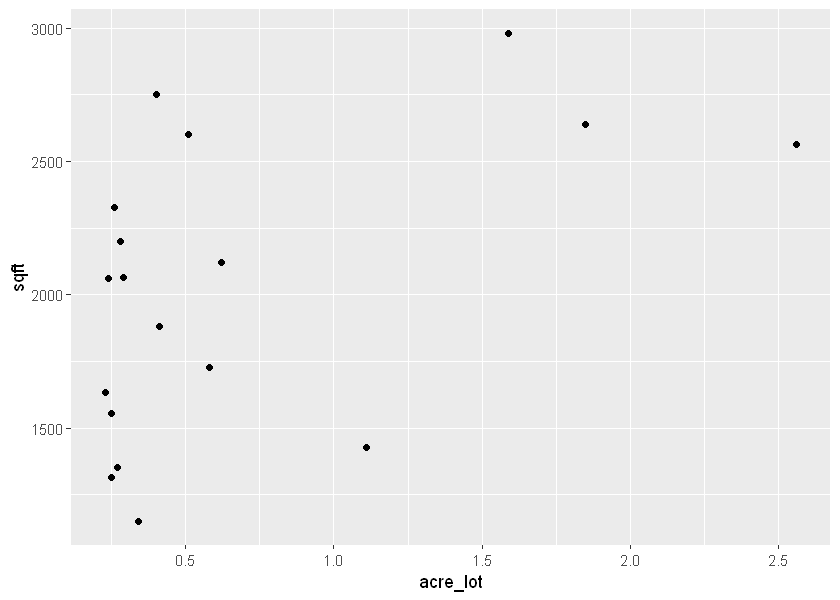

In [196]:
recs <- head(best_homes[order(best_homes$acre_lot),], -4)
best_plot <- ggplot(recs, aes(acre_lot, sqft)) +
            geom_point()
best_plot

Thus within the options, the best homes the married couple can afford are:

In [197]:
head(recs[order(-recs$acre_lot),],4)

,price,bed,bath,sqft,acre_lot,address
408,375000,4,3,2564,2.56,"22272 Saddleback Rd, Tehachapi, CA 93561"
3161,375000,4,3,2640,1.85,"16315 County Road 71, Alturas, CA 96101"
2755,325000,4,3,2980,1.59,"24693 Mesa Dr, Pioneer, CA 95666"
3491,239900,5,3,1426,1.11,"130 and 140 Sugar Pine Dr, Trinity Center, CA 96091"


## Same exercise but using `sqft` dataframe

In [184]:
alt_homes <- sqft[sqft$price < 459700,]

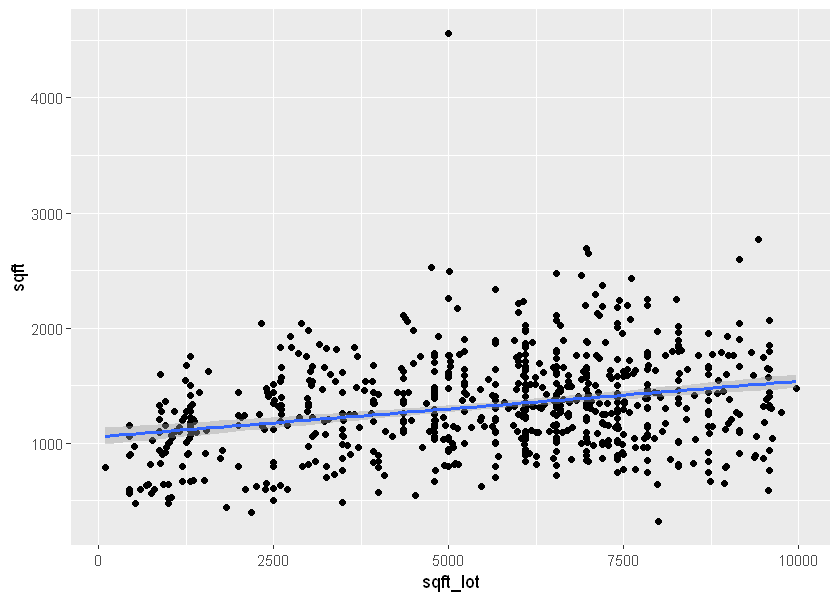

In [190]:
alt_plot <- ggplot(alt_homes, aes(sqft_lot, sqft)) +
            geom_point() +
            geom_smooth(method='lm')
alt_plot

Thus the best homes for the married couple using `sqft` dataframe are:

In [191]:
head(alt_homes[order(-alt_homes$bath),], 10)

,price,bed,bath,sqft,sqft_lot,address
1220,424900,5,5.0,2290,7100,"16451 Chestnut St, Hesperia, CA 92345"
399,369900,5,4.0,2250,8259,"1351 Frankfort Ct, Merced, CA 95348"
959,410000,5,4.0,2645,6996,"5425 W Lansing Way, Fresno, CA 93722"
1200,369999,6,4.0,1800,5227,"1026 Quincy St, Bakersfield, CA 93305"
1499,400000,4,4.0,2772,9425,"4348 E Fairfax Ave, Fresno, CA 93703"
1506,449000,5,4.0,873,9374,"929 Columbia St, Madera, CA 93638"
3361,389000,2,4.0,1456,4792,"6333 Tuckaway Ave, Banning, CA 92220"
270,425000,4,3.5,1736,6534,"46145 Willow Ln, Indio, CA 92201"
2369,170000,6,3.5,4560,5000,"42 Av Cumbres De Coronel, CA 22715"
36,249200,3,3.0,1293,6072,"1825 Letts Ave, Corcoran, CA 93212"
